<a href="https://colab.research.google.com/github/saitros/100days-commit-project/blob/master/Paper/Vision/stack_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import json

from IPython import display

In [0]:
# text conditioning variable  is c 
# text embedding is \pi 
# \pi is output of text description
# if \pi have 256 dimension 
# \mu is \pi[:,:128]
# \sigma \pi[:, 128:]
# \epsilon tf.random.normal(shape= \sigma, mean=\mu, stddev=tf.math.sqrt(\sigma))
# c = \mu + \sigma * \epsilon

In [0]:
class StackGan():
    def __init__(self):
        print('Stack Gan Initialize')

    def embedding_model(self, text_seq):
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(input_dim=data_config['vocab_size'],
                                      output_dim=256, input_length=22)])

        return model(text_seq, training=False)

    def ca_model(self, text_embedding):
        #condition.shape default 128 at paper 

        mu = text_embedding[:,:128]
        sigma = text_embedding[:, 128:]
        epsilon = tf.random.normal(shape=sigma.shape, mean=mu, stddev=tf.math.sqrt(sigma))

        condition = tf.math.multiply(sigma * epsilon) + mu

        return condition
        

    def stage1_g(self, condition, noise):
        # noise.shape default 100 at paper 

        merged_x = tf.concat([condition, noise], axis=-1)
        # 128 + 100 = 228

        # to mnist real img size is 28, 28 
        # upsampling 7,7 --> 14, 14 --> 28, 28 (stage 2 ?)
        # stage 2 --> high resolution 
        '''
        First Discussion :
            About Color Mnist, discussing stage-2 GAN.
        '''
        # upsampling to 64,64 
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=z.shape))
        # use ReLU after Batch normal 
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.ReLU())

        model.add(tf.keras.layers.Reshape((7, 7, 256)))
        assert model.output_shape == (None, 7, 7, 256)

        model.add(tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=1, padding='same', use_bias=False))
        assert model.output_shape == (None, 7, 7, 128)
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.ReLU())

        model.add(tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=1 padding='same', use_bias=False))
        assert model.output_shape == (None, 14, 14, 64)
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.ReLU()
 
        model.add(tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=1, padding='same', use_bias=False, activation='tanh'))
        assert model.output_shape == (None, 28, 28, 3)

        return model(merged_x)

    def stage1_d(self, text_embedding, img):
        # 2^6 to 2^2 
        # 28 
        downsmaple_model = tf.keras.Sequential()
        downsmaple_model.add(tf.keras.layers.Conv2D(64, (4, 4), strides=2, padding='same', use_bias=False))
        downsmaple_model.add(tf.keras.layers.LeakyReLU())

        downsmaple_model.add(tf.keras.layers.Conv2D(128, (4, 4), strides=2, padding='same', use_bias=False))
        downsmaple_model.add(tf.keras.layers.BatchNormalization())
        downsmaple_model.add(tf.keras.layers.LeakyReLU())

        downsmaple_model.add(tf.keras.layers.Conv2D(256, (4, 4), strides=2, padding='same', use_bias=False))
        downsmaple_model.add(tf.keras.layers.BatchNormalization())
        downsmaple_model.add(tf.keras.layers.LeakyReLU())

        downsmaple_model.add(tf.keras.layers.Conv2D(512, (4, 4), strides=2, padding='same', use_bias=False))
        downsmaple_model.add(tf.keras.layers.BatchNormalization())
        downsmaple_model.add(tf.keras.layers.LeakyReLU())

        x = downsmaple_model(img)

        merged_x = tf.concat([x, text_embedding])

        

        

    def embedding_compressor_model(self, text_embedding):
        # input 22, 256 
        # output (4,4, 128)
        text_embedding
        

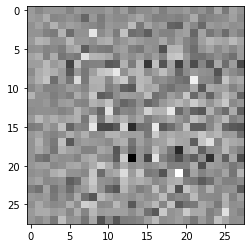

In [0]:
generator = stage1_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')